In [448]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import datasets, svm
from sklearn.kernel_approximation import Nystroem
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from math import sqrt
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

plt.style.use('bmh')
df = pd.read_csv('insurance.csv')

# Exploration du dataset

## Valeurs nulles

In [449]:
#Check empty values
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


On voit qu'aucune donn√©e n'est manquante dans le jeu de donn√©es.
Il nous faudra voir si toutes les donn√©es sont pertinentes, mais pour le moment, nous n'avons pas √† en supprimer.

## Cast des donn√©es de certaines colonnes

Afin de pouvoir analyser des donn√©es sous formes d'histogrammes, nous allons devoir transformer les donn√©es textuelles en int.
Il s'agit de "sex", "smoker" et "region". 
sex_male : male -> 1 et female -> 0
smoker_yes : no -> 0 et yes -> 1
region => southwest -> 0, southeast -> 1, northwest -> 2, northeast -> 3

In [ ]:
#Parse string to int
df['sex'] = df['sex'].replace({'male': 1, 'female': 0})
df['smoker'] = df['smoker'].replace({'yes': 1, 'no': 0})
df['region'] = df['region'].replace({'southwest': 0, 'southeast': 1, 'northwest':2, 'northeast':3})

## Boxplots

TypeError: Could not convert malemalemalemalefemalefemalefemalemalefemalemalemalefemalemalefemalemalemalefemalefemalemalemalefemalefemalefemalemalefemalefemalemalemalefemalemalefemalefemalemalefemalemalemalefemalefemalefemalefemalefemalefemalefemalefemalemalemalemalefemalefemalefemalemalefemalemalefemalemalemalemalefemalemalefemalefemalemalefemalefemalefemalefemalefemalefemalefemalemalefemalefemalemalefemalemalefemalefemalefemalemalemalemalefemalemalefemalemalemalemalefemalefemalemalemalefemalefemalefemalefemalemalefemalefemalefemalemalefemalefemalemalemalefemalefemalemalemalemalefemalefemalefemalemalemalemalefemalefemalemalefemalemalefemalemalemalefemalefemalefemalemalemalemalemalefemalefemalemalemalefemalefemalemalefemalemalefemalemalefemalefemalefemalefemalemalefemalemalefemalemalemalefemalefemalefemalefemalefemalefemalefemalemalefemalemalefemalemalemalemalemalefemalefemalefemalefemalemalefemalefemalefemalefemalemalemalemalefemalefemalemalefemalefemalefemalemalemalefemalemalemalefemalefemalemalemalefemalemalemalemalemalefemalefemalemalefemalefemalefemalemalemalemalemalemalemalefemalemalefemalemalefemalemalefemalefemalemalefemalefemalemalefemalemalefemalemalemalefemalemalefemalefemalefemalemalefemalefemalemalefemalemalefemalemalemalemalemalefemalemalemalefemalemalemalemalefemalemalefemalefemalefemalemalemalemalefemalefemalemalefemalemalefemalefemalemalemalefemalemalefemalefemalefemalemalefemalemalemalemalemalefemalefemalemalefemalefemalefemalefemalefemalemalemalefemalefemalefemalemalefemalemalemalefemalemalemalefemalemalefemalefemalemalefemalemalemalefemalemalefemalemalemalefemalefemalemalefemalemalemalefemalefemalefemalemalemalemalemalefemalefemalemalemalemalemalemalefemalefemalefemalefemalemalefemalemalefemalemalemalemalemalefemalemalefemalemalefemalefemalemalefemalefemalemalemalemalemalemalemalemalefemalefemalemalefemalefemalefemalemalemalefemalefemalefemalefemalemalefemalefemalefemalemalemalemalemalemalefemalefemalemalefemalefemalemalemalefemalefemalefemalemalemalefemalemalefemalefemalemalefemalemalemalemalefemalefemalemalemalemalemalemalemalemalefemalemalefemalefemalefemalefemalefemalefemalefemalemalemalefemalemalemalemalemalefemalefemalefemalemalefemalefemalefemalemalemalefemalefemalemalefemalemalefemalefemalemalemalemalemalefemalefemalemalemalefemalefemalefemalemalefemalefemalefemalefemalefemalefemalefemalemalemalefemalemalemalemalefemalemalefemalemalefemalefemalefemalemalemalemalefemalefemalefemalemalefemalefemalemalefemalefemalefemalefemalemalefemalefemalefemalefemalefemalefemalefemalemalefemalemalefemalemalemalemalemalemalefemalemalemalemalefemalefemalemalemalemalefemalemalemalemalefemalemalefemalefemalefemalefemalefemalefemalefemalemalefemalefemalemalefemalefemalemalemalefemalemalefemalemalefemalemalefemalemalefemalefemalemalemalefemalemalemalemalefemalemalemalemalemalefemalefemalefemalemalefemalefemalefemalemalefemalefemalefemalemalefemalefemalemalefemalefemalemalefemalemalefemalemalefemalefemalefemalemalemalemalefemalemalefemalefemalemalefemalefemalefemalefemalemalemalefemalemalefemalemalemalefemalemalemalemalefemalemalemalefemalemalefemalemalemalefemalefemalemalefemalefemalefemalemalefemalefemalemalemalemalemalemalemalemalemalefemalefemalemalemalemalefemalefemalemalefemalefemalemalefemalefemalefemalefemalemalemalefemalefemalefemalemalemalefemalefemalemalemalemalefemalefemalemalemalemalefemalefemalemalefemalemalemalefemalefemalemalemalemalemalefemalefemalefemalemalemalemalefemalemalefemalemalemalefemalefemalefemalemalefemalefemalefemalemalemalemalemalemalefemalemalefemalemalemalemalefemalefemalemalemalefemalemalemalefemalemalefemalemalemalefemalemalemalefemalemalefemalefemalemalemalemalefemalefemalemalefemalemalemalefemalefemalemalefemalefemalefemalefemalefemalemalemalemalemalefemalefemalefemalemalemalefemalemalefemalemalefemalemalefemalemalemalemalefemalefemalemalemalefemalemalemalemalefemalemalemalemalefemalefemalefemalemalemalemalemalemalefemalefemalefemalefemalefemalemalemalemalefemalefemalemalemalefemalemalefemalemalefemalemalefemalefemalefemalemalefemalefemalefemalefemalefemalemalemalemalemalemalemalemalefemalefemalemalefemalemalefemalefemalefemalefemalemalemalefemalefemalemalemalefemalefemalemalefemalemalemalemalefemalemalefemalefemalefemalemalemalefemalemalefemalefemalefemalemalemalemalemalefemalefemalemalemalemalefemalemalemalefemalefemalefemalefemalemalemalemalemalemalemalefemalemalemalemalemalefemalemalefemalefemalemalefemalefemalemalemalemalemalefemalefemalefemalemalemalefemalefemalemalemalemalefemalemalefemalefemalemalefemalemalefemalefemalemalemalefemalemalefemalefemalefemalemalemalefemalefemalemalemalemalefemalemalemalefemalefemalefemalefemalefemalefemalefemalefemalefemalemalemalefemalefemalefemalemalefemalemalefemalefemalemalemalefemalefemalefemalefemalefemalefemalefemalemalefemalefemalefemalefemalefemalefemalefemalefemalemalemalefemalemalemalemalemalemalefemalemalemalemalemalefemalefemalemalemalemalefemalefemalemalemalemalefemalemalemalemalemalefemalemalefemalemalefemalefemalemalefemalefemalefemalemalemalefemalemalefemalemalefemalefemalefemalefemalefemalemalefemalefemalemalefemalefemalefemalefemalefemalemalemalefemalemalemalemalefemalefemalefemalefemalemalefemalefemalefemalemalefemalemalemalemalemalemalefemalemalefemalefemalefemalemalemalefemalemalemalefemalemalemalefemalemalemalemalemalefemalemalefemalemalefemalefemalefemalemalefemalefemalefemale to numeric

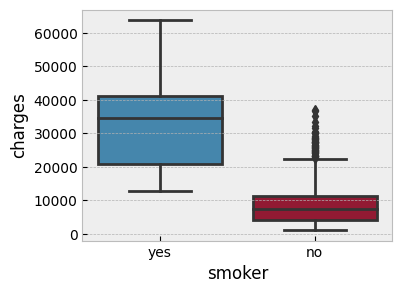

In [450]:
plt.figure("Smoker vs charges", figsize=(4, 3))
sns.boxplot(x='smoker', y='charges', data=df)
df.groupby('smoker').agg(['mean','min','max'])['charges']

La m√©diane des charges des non-fumeurs est tr√®s largement inf√©rieure √† celles des fumeurs.
Aussi, la valeur maximimale de charges pay√©es par un fumeur est de 63770‚Ç¨ contrairement aux non fumeurs, situ√©es √† un peu moins de 40000‚Ç¨. 

Ce boxplot nous indique donc que les deux groupes ont des distributions de charges diff√©rentes, sans pour autant impliquer que le tabagisme est la cause de cette diff√©rence. En effet, il est possible que d'autres facteurs tels que l'√¢ge, le sexe, le r√©gime alimentaire ou les ant√©c√©dents m√©dicaux puissent influencer les niveaux de charges dans les deux groupes.

<Axes: xlabel='region', ylabel='charges'>

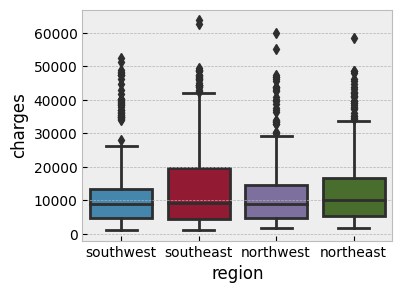

In [ ]:
plt.figure("Region vs charges", figsize=(4, 3))
sns.boxplot(x='region', y='charges', data=df)
df.groupby('region').agg(['mean','min','max'])['charges']

On peut remarquer que la m√©diane de charges m√©dicales pay√©es est √©gale pour tous les boxplots repr√©sentant chaque r√©gion.

<Axes: xlabel='sex', ylabel='charges'>

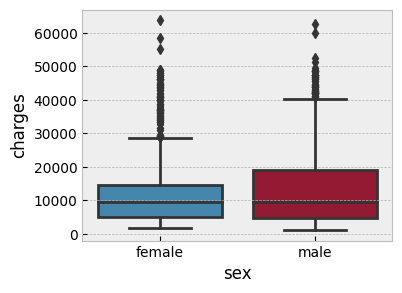

In [ ]:
plt.figure("Sex vs charges", figsize=(4, 3))
sns.boxplot(x='sex', y='charges', data=df)
df.groupby('sex').agg(['mean','min','max'])['charges']

On peut remarquer que la m√©diane de charges m√©dicales pay√©es est √©gale pour les boxplots de sexe f√©minin et masculin.

In [ ]:
plt.figure("Children vs charges", figsize=(4, 3))
sns.boxplot(x='children', y='charges', data=df)
df.groupby('children').agg(['mean','min','max'])['charges']

A interpreter

In [ ]:
plt.figure("BMI vs charges", figsize=(4, 3))
sns.boxplot(x='bmi', y='charges', data=df)
df.groupby('bmi').agg(['mean','min','max'])['charges']

A interpreter

In [ ]:
#Scatter Matrix plot
#sns.pairplot(df)

A interpr√©ter

## Pairplots

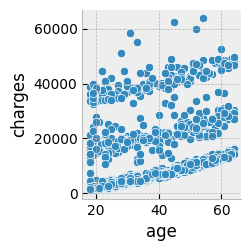

In [ ]:
#Scatter plots of charges vs all (prettier to see than the matrix)
sns.pairplot(data=df, x_vars=['age'], y_vars=['charges'])


A interpr√©ter

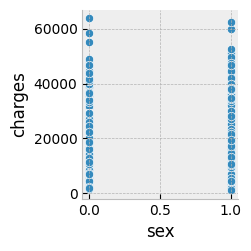

In [ ]:
sns.pairplot(data=df, x_vars=['sex'], y_vars=['charges'])

A interpr√©ter

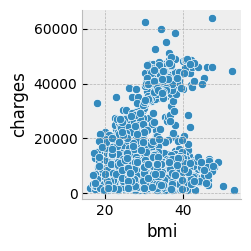

In [ ]:
sns.pairplot(data=df, x_vars=['bmi'], y_vars=['charges'])

A interpr√©ter

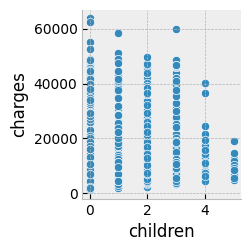

In [ ]:
sns.pairplot(data=df, x_vars=['children'], y_vars=['charges'])

A interpr√©ter

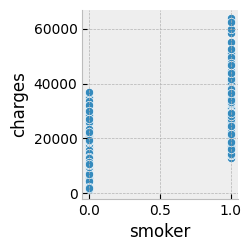

In [ ]:
sns.pairplot(data=df, x_vars=['smoker'], y_vars=['charges'])

A interpr√©ter

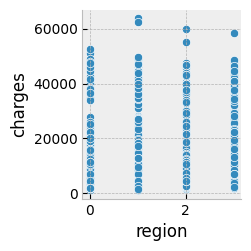

In [ ]:
sns.pairplot(data=df, x_vars=['region'], y_vars=['charges'])

A interpr√©ter

## Corr√©lations


There are 4 lowly correlated values and 1 highly correlated value with Charges:
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region      0.006208
Name: charges, dtype: float64


<Axes: >

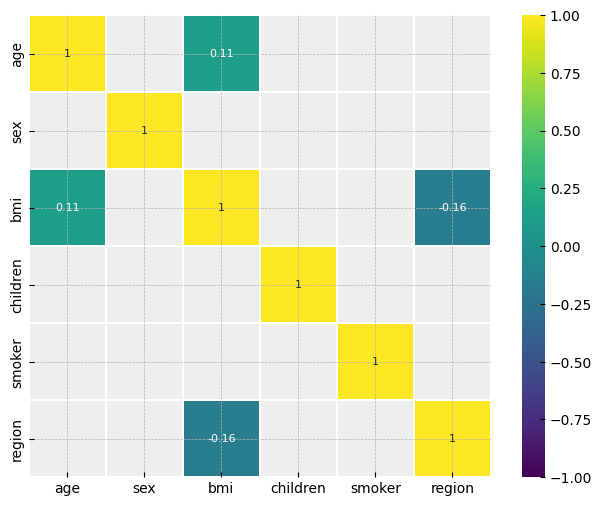

In [ ]:
dfcorr = df.corr()['charges'][:-1]
golden_features_list = dfcorr.sort_values(ascending=False)
print(
    "\nThere are {} lowly correlated values and 1 highly correlated value with Charges:\n{}"
    .format(len(golden_features_list) - 2, golden_features_list))

corr = df.drop('charges',
               axis=1).corr()  # We already examined Charges correlations
plt.figure(figsize=(8, 6))

sns.heatmap(corr[(corr >= 0.1) | (corr <= -0.1)],
            cmap='viridis',
            vmax=1.0,
            vmin=-1.0,
            linewidths=0.1,
            annot=True,
            annot_kws={"size": 8},
            square=True)

A interpr√©ter
//Pas de corr√©lation entre les variables ??

Conclusion : si on enl√®ve des donn√©es inutiles ou pas ?

## Split du jeu de donn√©es en jeu d'entra√Ænement et de test

Nous allons d√©buter par diviser notre jeu de donn√©es en un jeu d'entra√Ænement et un jeu de tests
30% des donn√©es seront de test, et 70% seront d'entra√Ænement.
Le random_state = 42 nous garantie que les m√™mes jeux de donn√©es sont obtenues √† chaque ex√©cution du code. C'est particuli√®rement important pour la reproductibilit√© des r√©sultats dans les exp√©riences de machine learning. Nous l'avons fix√© arbitrairement √† 42.

In [ ]:
X = df.drop(['charges'], axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

X_train: un DataFrame contenant les donn√©es d'entra√Ænement pour les variables explicatives (toutes les colonnes de 'df' √† l'exception de 'charges').
y_train: une s√©rie contenant les donn√©es d'entra√Ænement pour la variable cible (la colonne 'charges').
X_test: un DataFrame contenant les donn√©es de test pour les variables explicatives.
y_test: une s√©rie contenant les donn√©es de test pour la variable cible.

Nous allons maintenant entra√Æner un mod√®le √† trouver un lien entre y_train (sorites) et X_train (entr√©es)

# Entra√Ænement

## Mod√®le de r√©gression lin√©aire

Nous d√©butons par le mod√®le de r√©gression lin√©aire car c'est l'une des m√©thodes de r√©gression les plus simples. L'un de ses principaux avantages est la facilit√© d'interpr√©tation des r√©sultats.

### Construction du mod√®le

In [ ]:
# Cr√©ation d'un objet modeleRegressionLineaire de r√©gression lin√©aire
modeleRegressionLineaire = LinearRegression()

# Entra√Ænement du mod√®le sur les donn√©es d'entra√Ænement
#Pour obtenir les meilleures pond√©rations, une minimisation de la somme des carr√©s des r√©sidus (SSR) sera cherch√©e, pour toutes les observations.
# Il s'agit de la m√©thode des moindres carr√©s ordinaires.
modeleRegressionLineaire.fit(X_train, y_train)

LinearRegression()

### Ce que dit le mod√®le


In [ ]:
for idx, col_name in enumerate(X_train.columns):
    print("Linear regression model coefficient for {} is {}".format(
        col_name, modeleRegressionLineaire.coef_[idx]))

Linear regression model coefficient for age is 261.62568984274697
Linear regression model coefficient for sex is 109.64719595060546
Linear regression model coefficient for bmi is 344.54483065603574
Linear regression model coefficient for children is 424.37016595763544
Linear regression model coefficient for smoker is 23620.802521481754
Linear regression model coefficient for region is 326.4626252721868


Les variables age, sex, bmi et region ont toutes un effet positif sur la variable cible Charges, et le nombre d'enfants ainsi que le tabagisme ont un effet encore plus positif. Il convient √©galement de noter que le coefficient de la variable smoker est beaucoup plus √©lev√© que celui des autres variables, ce qui indique que le tabagisme a un effet beaucoup plus important sur les co√ªts de sant√© que les autres variables.

In [ ]:
intercept = modeleRegressionLineaire.intercept_
print("The intercept for linear regression model is {}".format(intercept))

The intercept for linear regression model is -13343.77919809582


Ce r√©sultat indique que lorsque toutes les variables explicatives (√¢ge, sexe, IMC, nombre d'enfants, tabagisme et r√©gion) sont nulles, la charge moyenne pour une personne est d'environ -13252,02 euros. Ce n'est jamais le cas, donc ce renseignement ne nous semble pas pertinent.

### Evaluation de la qualit√© du mod√®le

Nous commencons par calculer le coefficient de d√©termination R¬≤ du mod√®le.
Il indique dans quelle mesure la variation de ùë¶ peut √™tre expliqu√©e par la d√©pendance √† X, en utilisant le mod√®le de r√©gression en question. Un ùëÖ¬≤ plus grand indique une meilleure ad√©quation et signifie que le mod√®le peut mieux expliquer la variation de la production avec diff√©rentes entr√©es. Par exemple, un ùëÖ¬≤√©gal √† 1 corresponds √† SSR = 0. Il s'agit d'un ajustement parfait, puisque les valeurs des r√©ponses pr√©dites et r√©elles s'accordent parfaitement entre elles.

In [ ]:
score = modeleRegressionLineaire.score(X_test, y_test)
print("Score du mod√®le : ", score)

Score du mod√®le :  0.7694415927057693


Un R¬≤ de 0,76 indique que le mod√®le de r√©gression lin√©aire est capable d'expliquer 76% de la variance de la variable cible en utilisant les variables explicatives. Le mod√®le est donc relativement performant.
En revanche, R¬≤ ne suffit pas √† √©valuer la qualit√© du mod√®le.

### Pr√©dictions du mod√®le

In [ ]:
predictionChargesRegressionLineaires = modeleRegressionLineaire.predict(X_test)

Nous allons maintenant pouvoir comparer predictionChargesRegressionLineaires et y_test

#### Lin√©arit√©

Tout d'abord, nous allons tracer un nuage de points qui repr√©sente la relation entre les valeurs r√©elles et les valeurs pr√©dites de la variable cible (Charges).

Text(0, 0.5, 'Valeurs pr√©dites par le mod√®le')

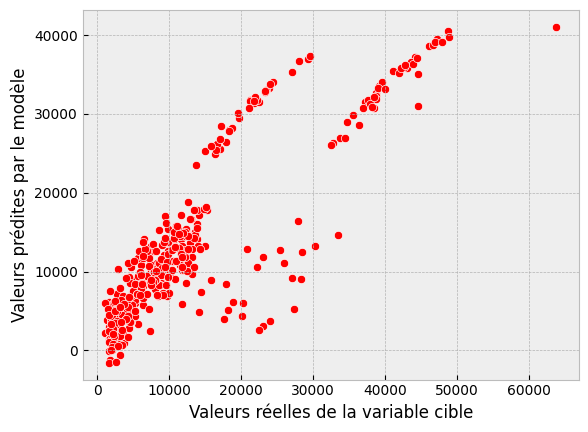

In [ ]:
sns.scatterplot(x=y_test, y=predictionChargesRegressionLineaires, color='r')
plt.xlabel("Valeurs r√©elles de la variable cible")
plt.ylabel("Valeurs pr√©dites par le mod√®le")

A interpr√©ter

#### Normalit√© et moyenne des r√©sidus

Nous allons visualiser la distribution des erreurs de pr√©diction de notre mod√®le de r√©gression lin√©aire, c'est-√†-dire la diff√©rence entre les valeurs r√©elles de la variable cible (y_test) et les valeurs pr√©dites par le mod√®le (predictionChargesRegressionLineaires).
Si l'histogramme des √©carts obtenus est centr√© autour de z√©ro et suit une distribution normale, cela signifie que les erreurs de pr√©diction sont faibles et que notre mod√®le est capable de faire des pr√©dictions pr√©cises. En revanche, si l'histogramme pr√©sente une distribution asym√©trique ou est centr√© autour d'une valeur non nulle, cela peut indiquer la pr√©sence de biais ou d'erreurs syst√©matiques dans notre mod√®le.

<Axes: xlabel='charges', ylabel='Count'>

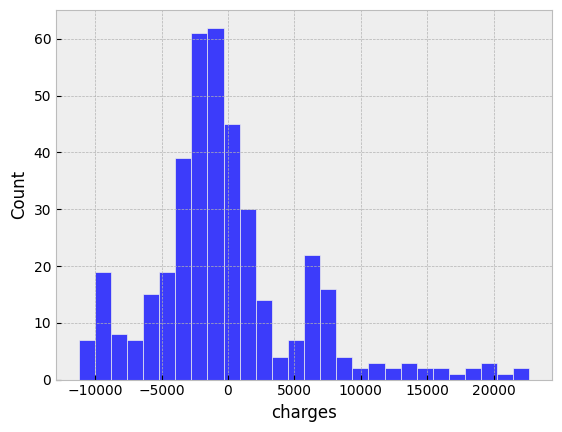

In [ ]:
sns.histplot((y_test - predictionChargesRegressionLineaires),color='b')

A interpr√©ter

#### Normalit√© multivari√©e

Text(0.5, 1.0, 'Check for Multivariate Normality: \nQ-Q Plot')

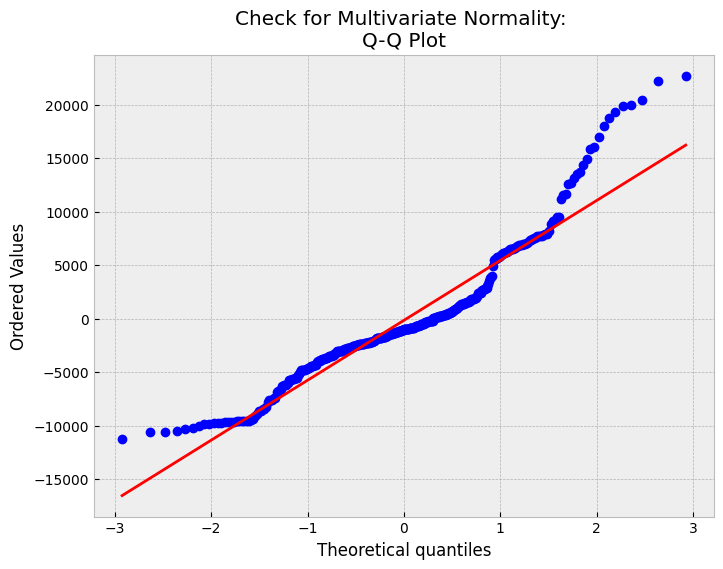

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# Tracer le graphique de probabilit√© normal
_, (_, _, r) = sp.stats.probplot((y_test - predictionChargesRegressionLineaires), fit=True, plot=ax)
ax.set_title('Check for Multivariate Normality: \nQ-Q Plot')

A interpr√©ter

#### Homosc√©dasticit√©

<Axes: ylabel='charges'>

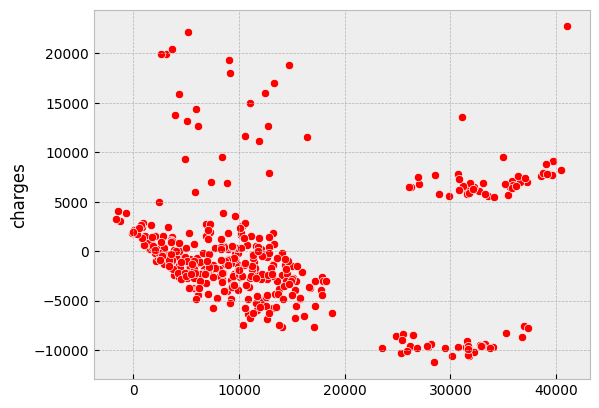

In [ ]:
sns.scatterplot(y = (y_test - predictionChargesRegressionLineaires), x= predictionChargesRegressionLineaires, color='r') 

A interpr√©ter

## Mod√®le de r√©gression de Kernel Ridge

### Construction du mod√®le


In [ ]:
k = 5

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=123)

kr_param_grid = {"alpha": [100, 50, 25, 10, 5, 1e0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5],
                "kernel": ['linear','rbf','poly'],
                "gamma": [1e0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]}

# # ridge works best
kr = GridSearchCV(KernelRidge(), cv=k, param_grid=kr_param_grid)
kr.fit(X_train, np.asarray(y_train).ravel())

train_rmse = sqrt(mean_squared_error(y_train, kr.predict(X_train)))
test_rmse = sqrt(mean_squared_error(y_test, kr.predict(X_test)))

print(train_rmse)
print(test_rmse)

C:\Users\33660\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=6.85809e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
C:\Users\33660\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=6.11025e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
C:\Users\33660\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=7.07648e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
C:\Users\3

4844.613870480204
4744.381415597341


A interpreter

In [ ]:
print(kr.best_params_)

{'alpha': 1e-05, 'gamma': 0.0001, 'kernel': 'rbf'}


A interpr√©ter

In [ ]:
kf = KFold(n_splits=k, shuffle=True, random_state=42)
modeleRegressionKernelRidge = KernelRidge(alpha=kr.best_params_['alpha'], kernel=kr.best_params_['kernel'], gamma=kr.best_params_['gamma'])

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

### Ce que dit le mod√®le


In [ ]:
coef = modeleRegressionKernelRidge.dual_coef_


### Evaluation de la qualit√© du mod√®le

### Pr√©dictions du mod√®le

## Nouveau mod√®le

Expliquer pourquoi Kernel regression

### Construction du mod√®le

### Ce que dit le mod√®le

### Evaluation de la qualit√© du mod√®le